In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
%matplotlib inline
import datetime
import pandas as pd
import numpy as np
from functools import partial

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from utils.datafetch import *
from utils.vectorized_funs import *

In [83]:
plt.style.use('classic')

In [84]:
exch = load_exchangesinfos()

_tkrs_list = ["AAPL","TWTR","GOOG","AMZN","XXII","DIS","MRVL","TTWO"]

initial_dataload(_tkrs_list)

amex has 400 tickers.
nasdaq has 3081 tickers.
nyse has 3299 tickers.


Final dataset has 6780 records
(NOK) Final dataset has duplicate tickers (6779 distinct)
(1/8) Recv. and Stored AAPL
(2/8) Recv. and Stored TWTR
(3/8) Recv. and Stored GOOG
(4/8) Recv. and Stored AMZN
(5/8) Recv. and Stored XXII
(6/8) Recv. and Stored DIS
(7/8) Recv. and Stored MRVL
(8/8) Recv. and Stored TTWO
Took 0:00:03.366180


{'NOK': [],
 'OK': ['AAPL', 'TWTR', 'GOOG', 'AMZN', 'XXII', 'DIS', 'MRVL', 'TTWO']}

In [85]:
_stock = dict()

for tkr in _tkrs_list:
    _stock[tkr] = pd.read_csv("{}/{}.csv".format(DATA_PATH, tkr))
    _stock[tkr]["Date"] = pd.to_datetime(_stock[tkr]["Date"], infer_datetime_format=True)

> matplotlib as two interfaces: Matlab-style and Object Oriented-style

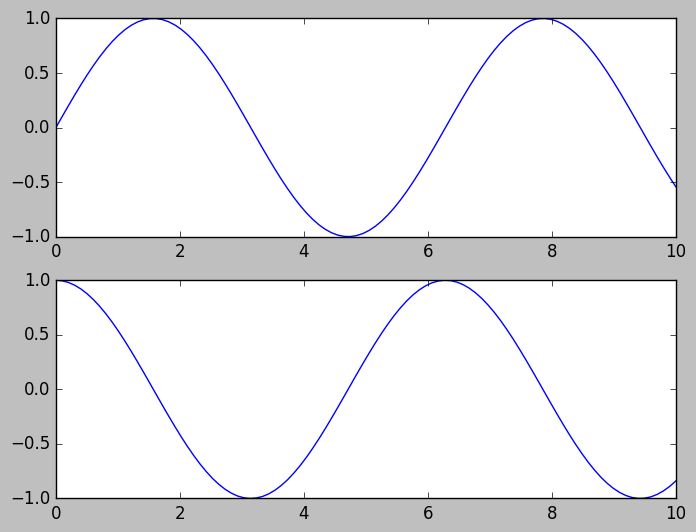

In [7]:
x = np.linspace(0, 10, 100)

###
### MATLAB STYLE
###

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

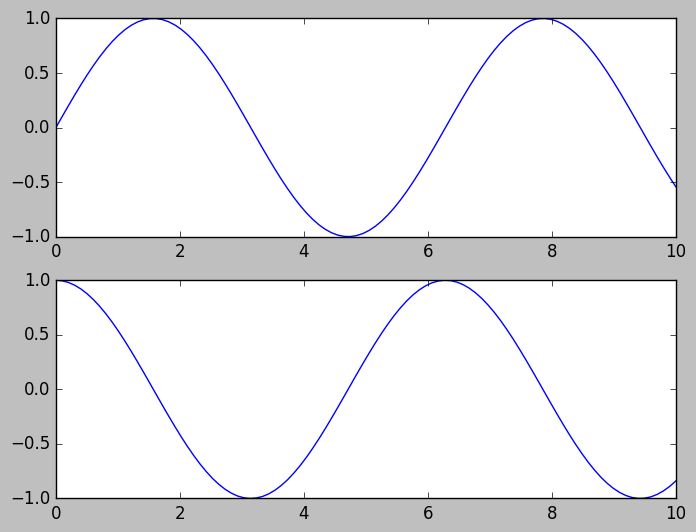

In [8]:
#
# OBJECT ORIENTED STYLE
#

# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

In [9]:
plt.style.use('seaborn-whitegrid')

> We can start with just a blank slate

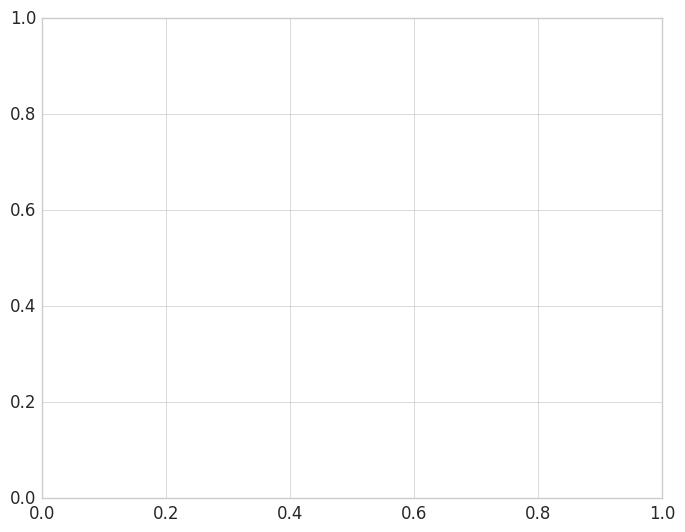

In [10]:

fig = plt.figure()
ax = plt.axes()

> we can use the set of axes we created before to do our plots

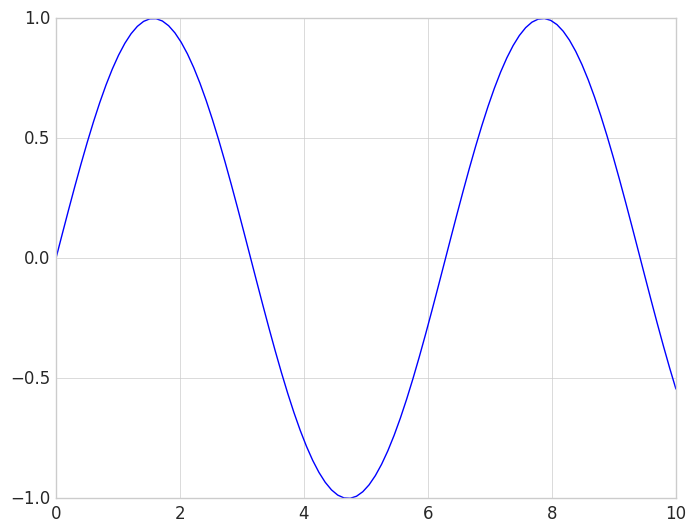

In [11]:
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x));

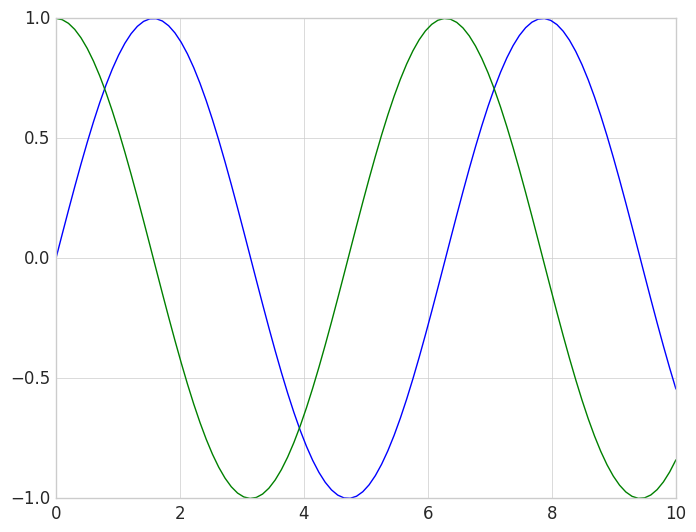

In [12]:
## This is back with the matlab style

plt.plot(x, np.sin(x));
plt.plot(x, np.cos(x));

> we can customize colors

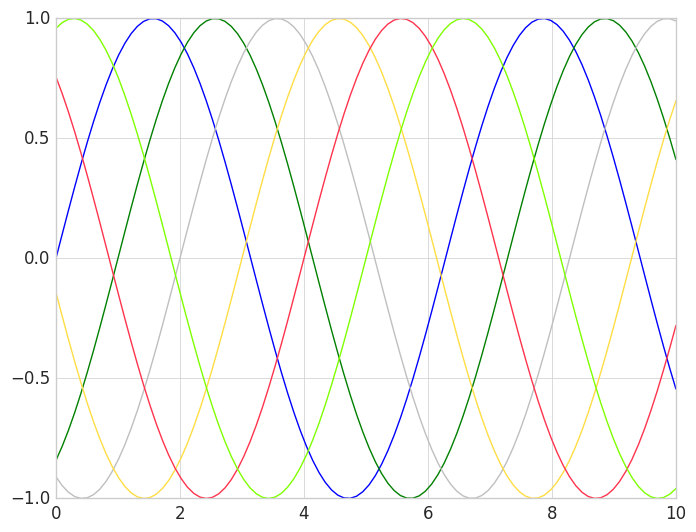

In [13]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

> And line styles

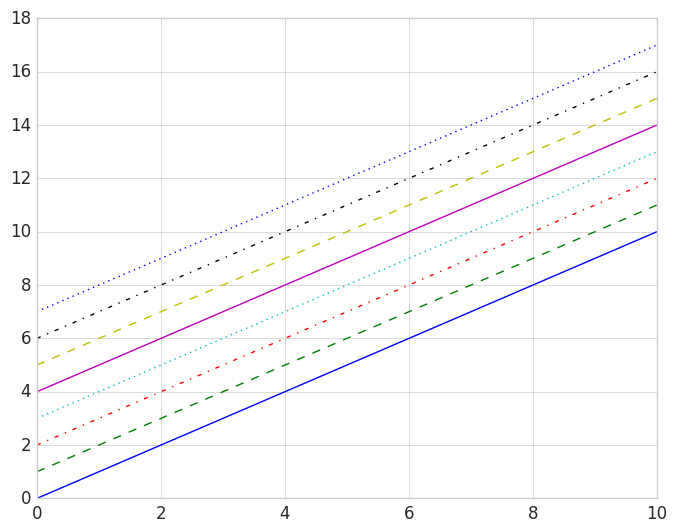

In [14]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

> or both at the same time

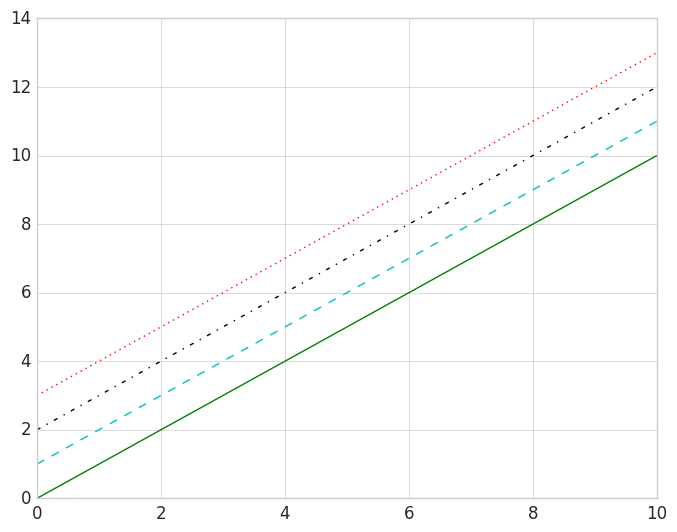

In [15]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

> lets see how we can set axes limits

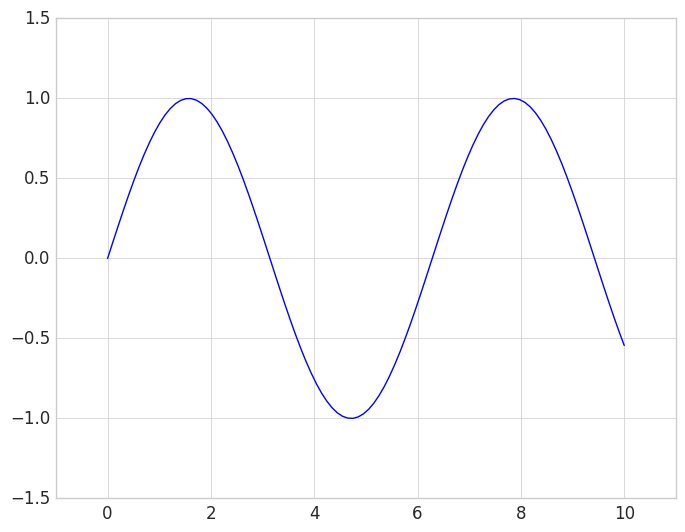

In [16]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

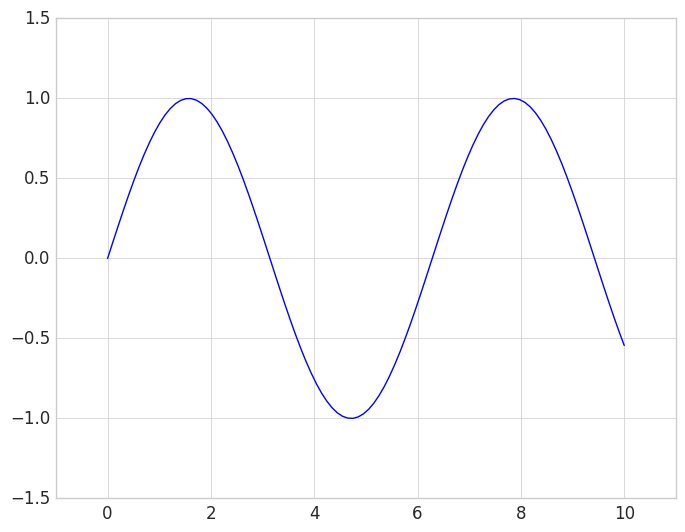

In [17]:
# this does the same as before

# plt.axis will receive an array of [xmin, xmax, ymin, ymax]

plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

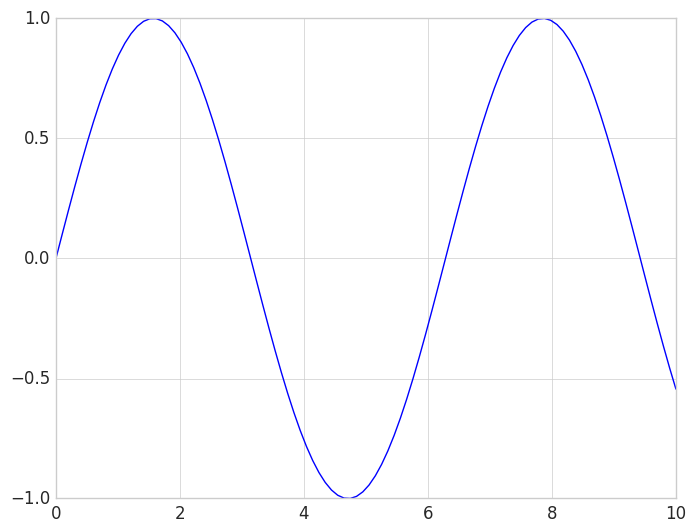

In [18]:
# this will fit the axes' bounds to the function

plt.plot(x, np.sin(x))
plt.axis('tight');

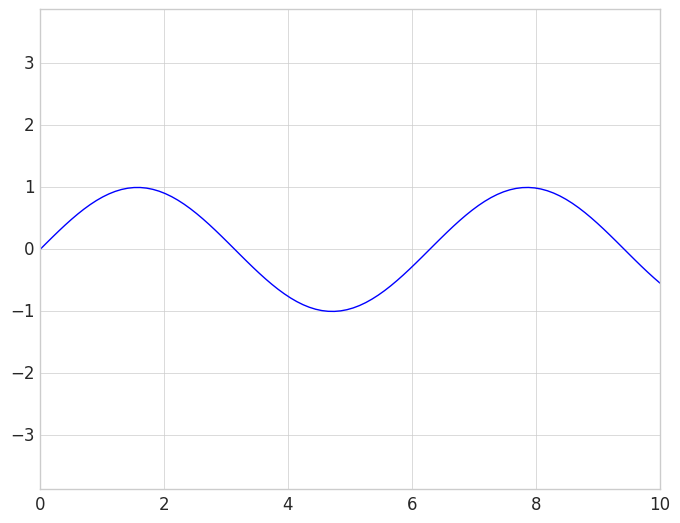

In [19]:
# we can also enforce a 1:1 scale regardind our screen resolution
plt.plot(x, np.sin(x))
plt.axis('equal');

> lets see labeling

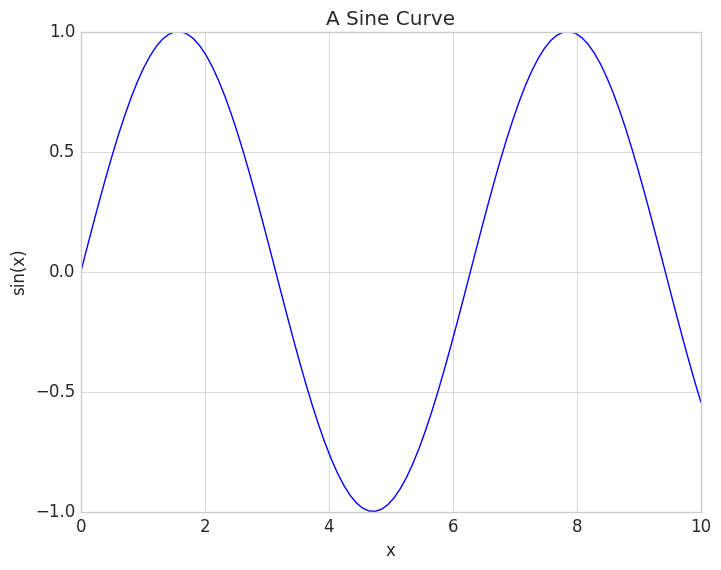

In [20]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

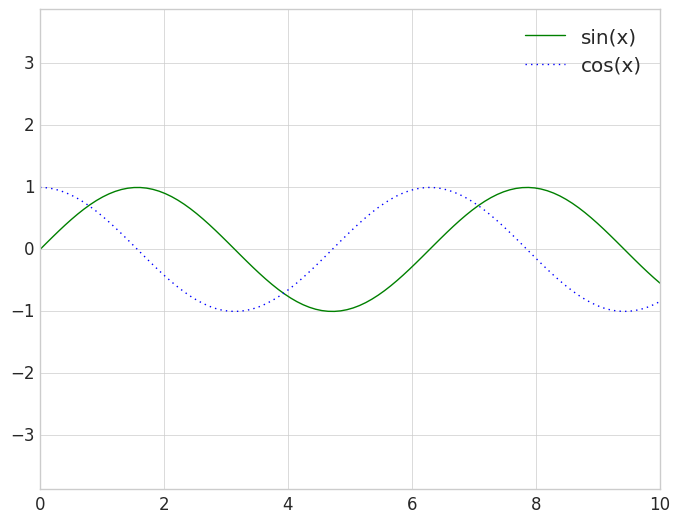

In [21]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

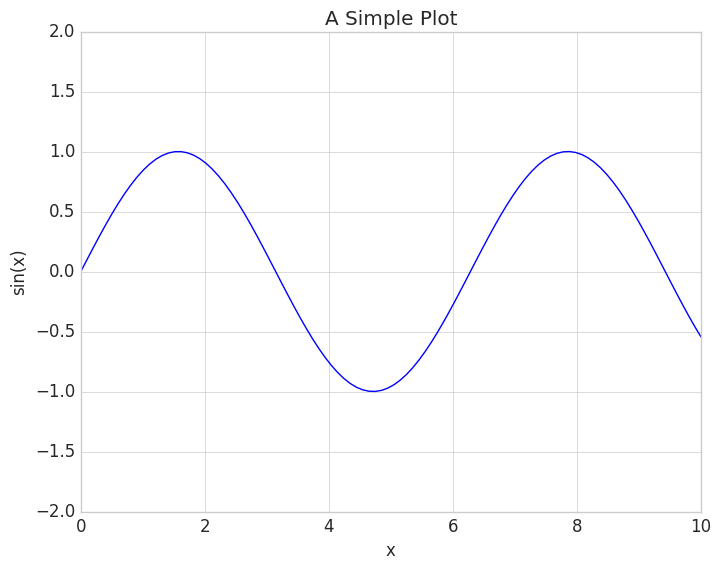

In [22]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

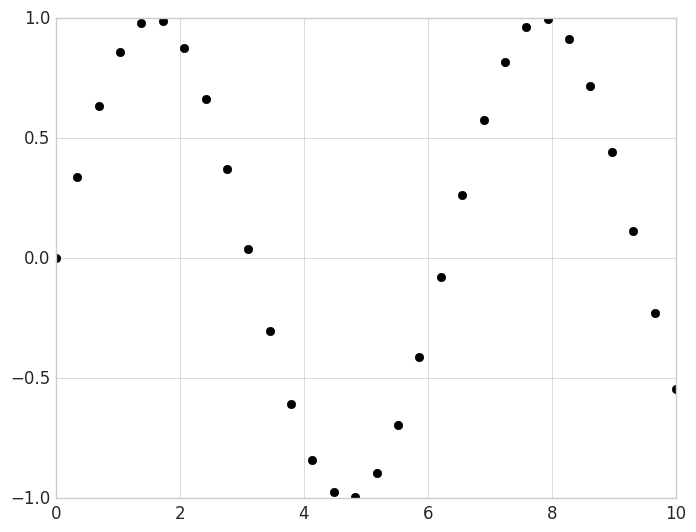

In [23]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

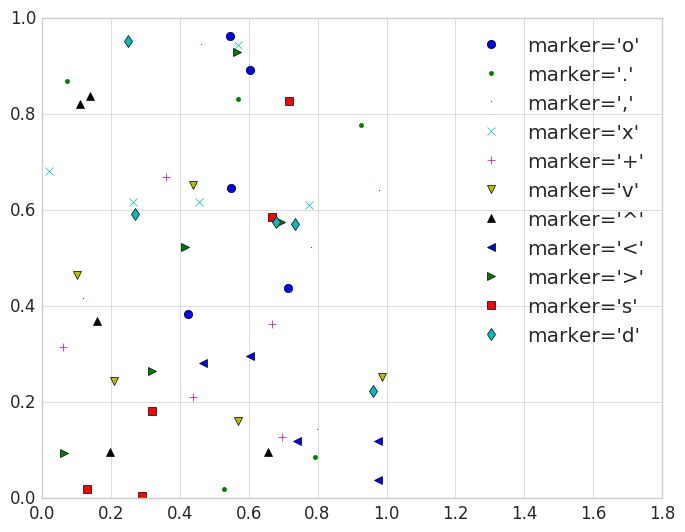

In [24]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

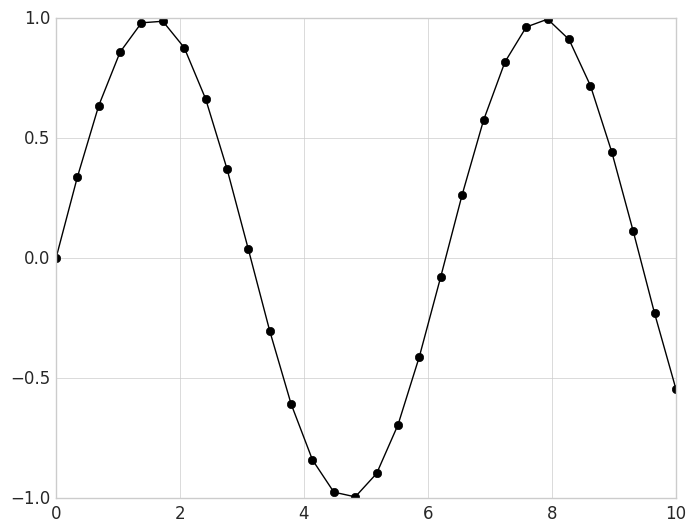

In [25]:
plt.plot(x, y, '-ok');

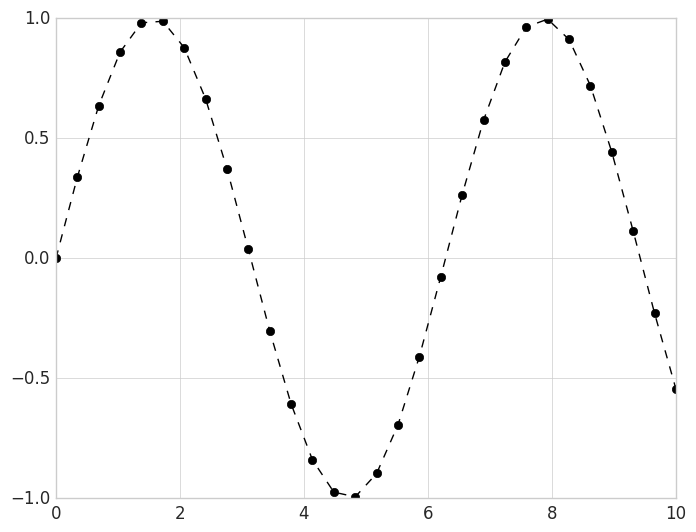

In [26]:
plt.plot(x, y, '--ok');

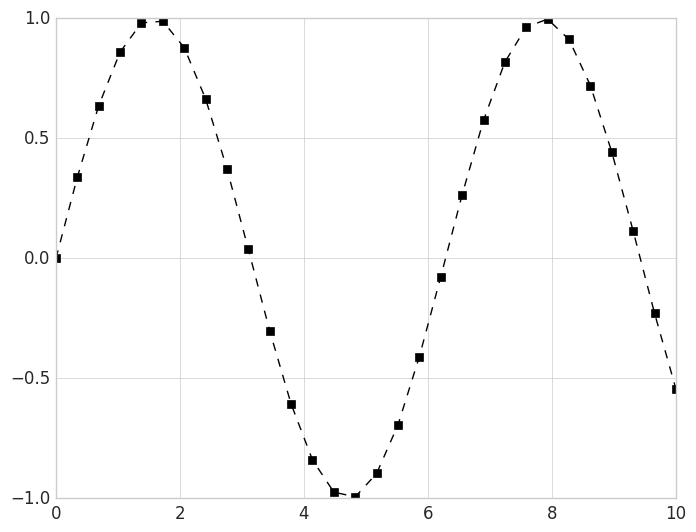

In [27]:
plt.plot(x, y, '--sk');

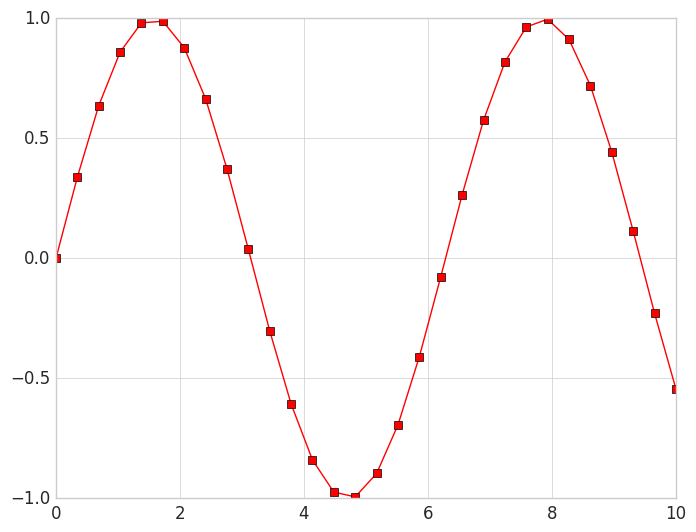

In [28]:
plt.plot(x, y, '-sr');

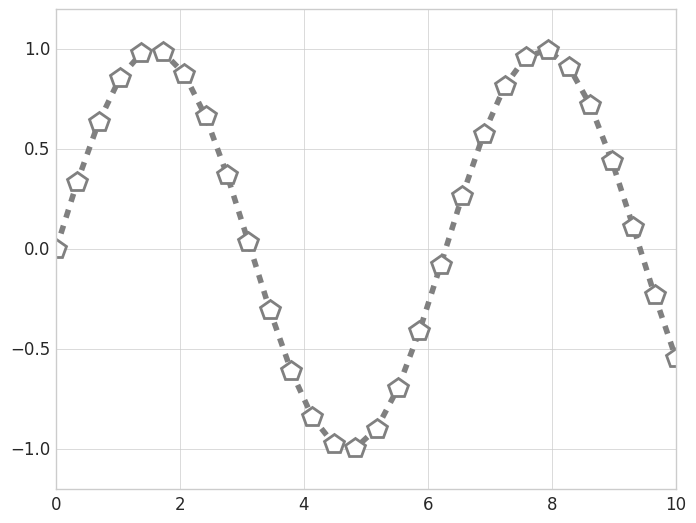

In [29]:
plt.plot(x, y, '--p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

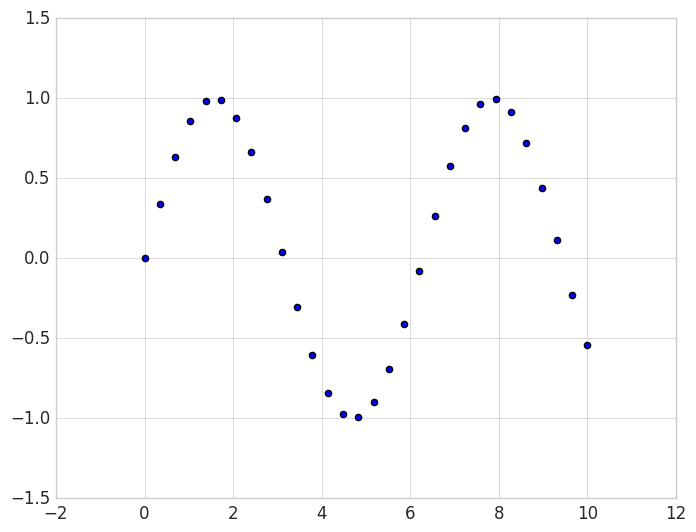

In [30]:
plt.scatter(x, y, marker='o');

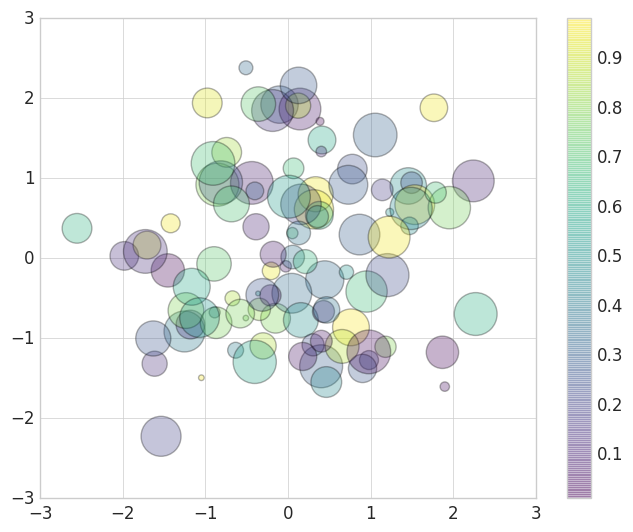

In [31]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

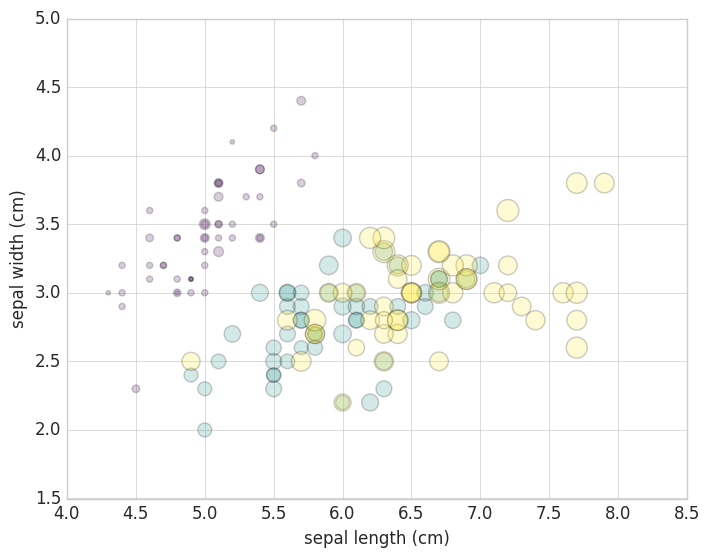

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

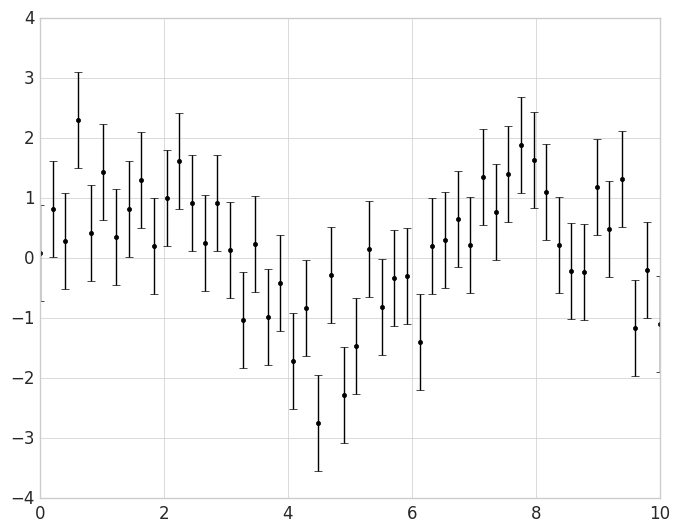

In [33]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

In [34]:
print(x.shape)
print(y.shape)
print(dy)

(50,)
(50,)
0.8


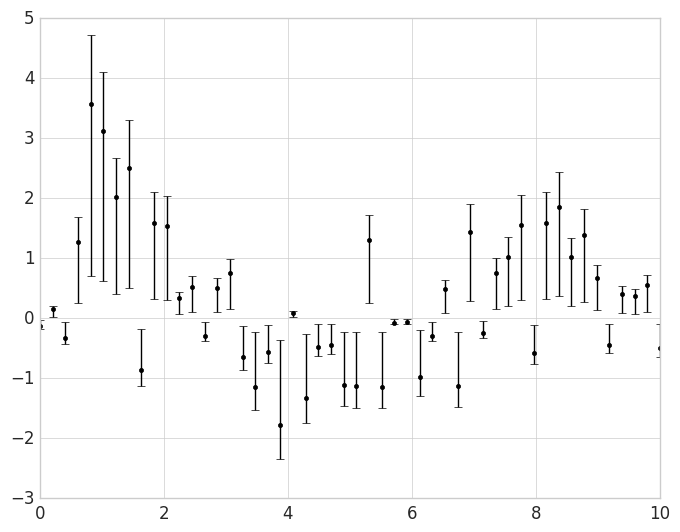

In [35]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=[y*dy, y*dy*0.4], fmt='.k');

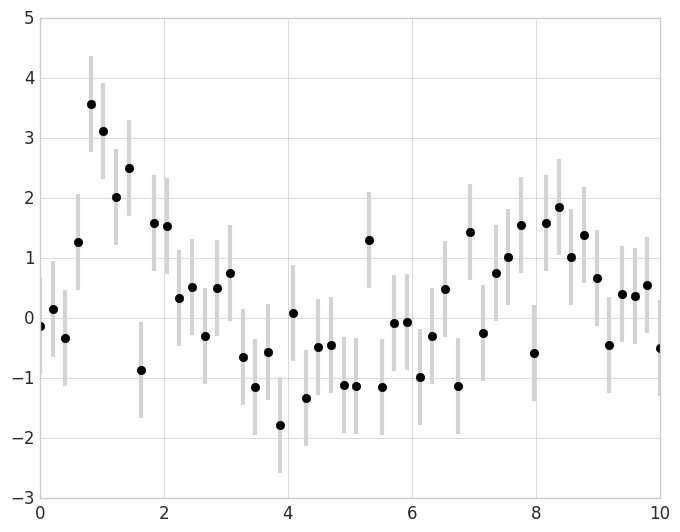

In [36]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In [37]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

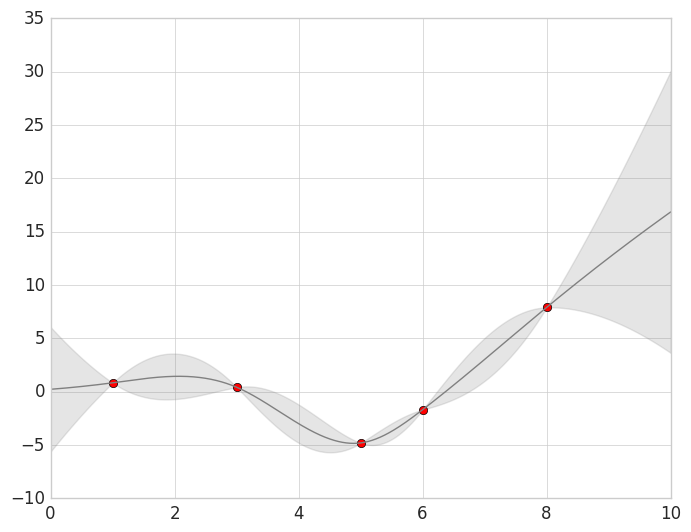

In [38]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

In [39]:
data = np.random.randn(1000)

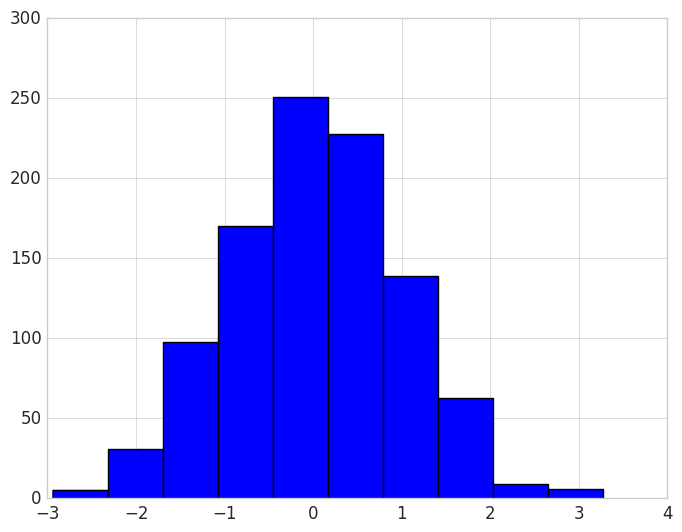

In [40]:
plt.hist(data);

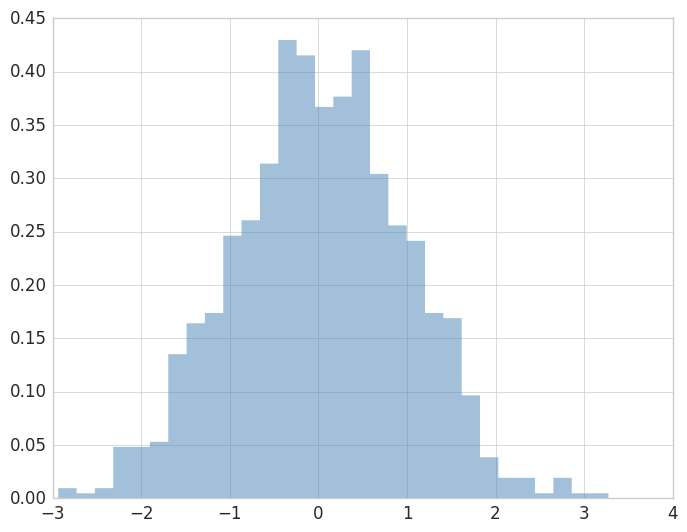

In [41]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

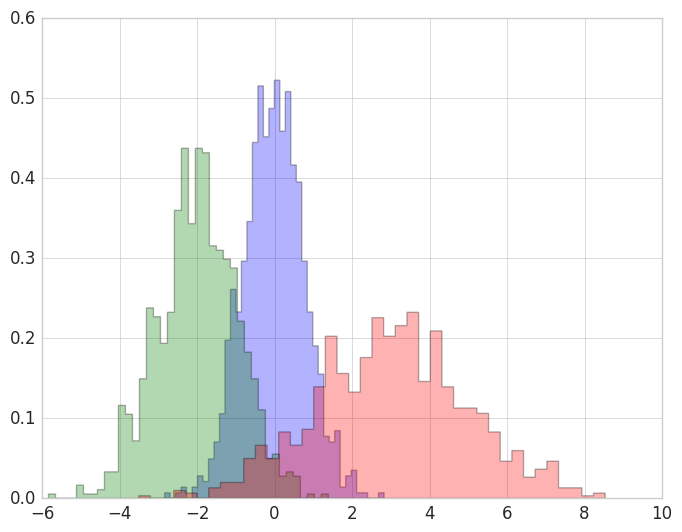

In [42]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

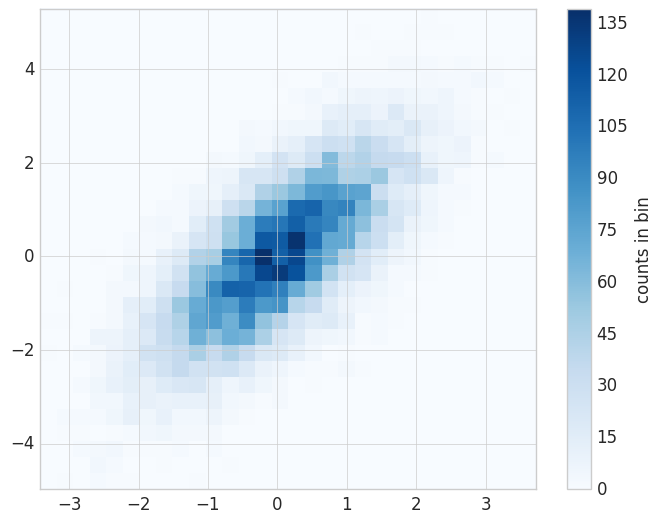

In [43]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

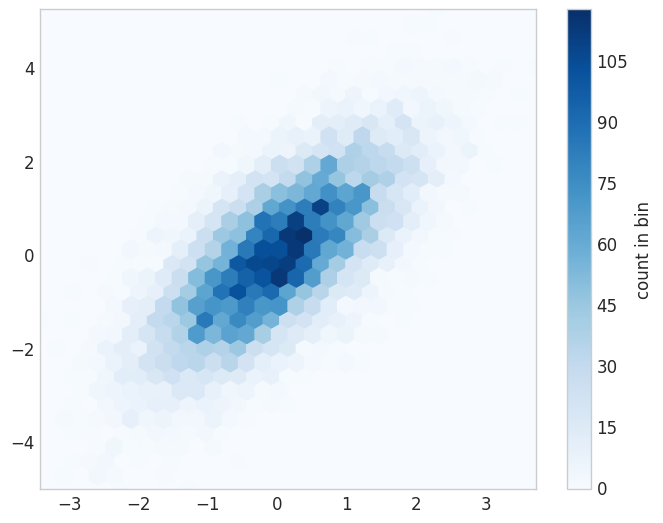

In [44]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

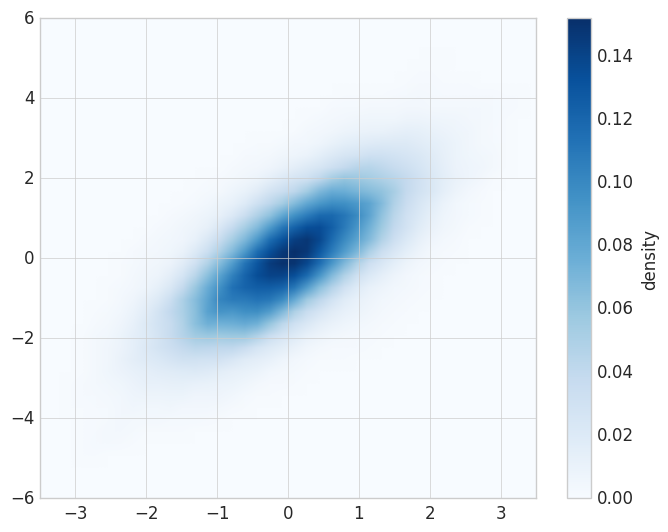

In [45]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

> We can also customize legends

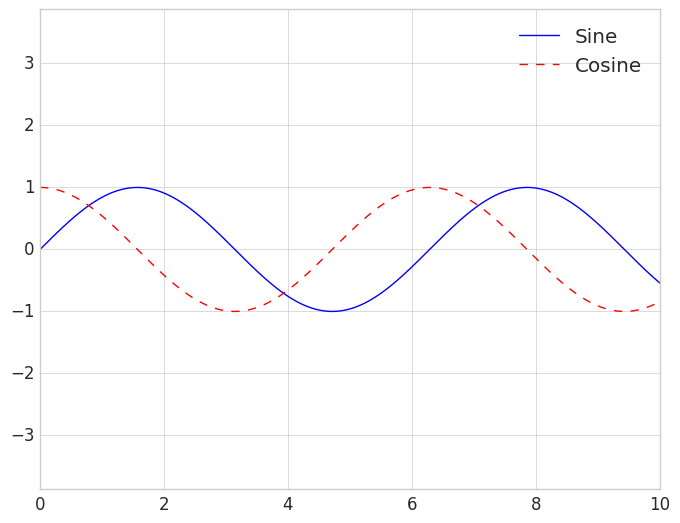

In [46]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

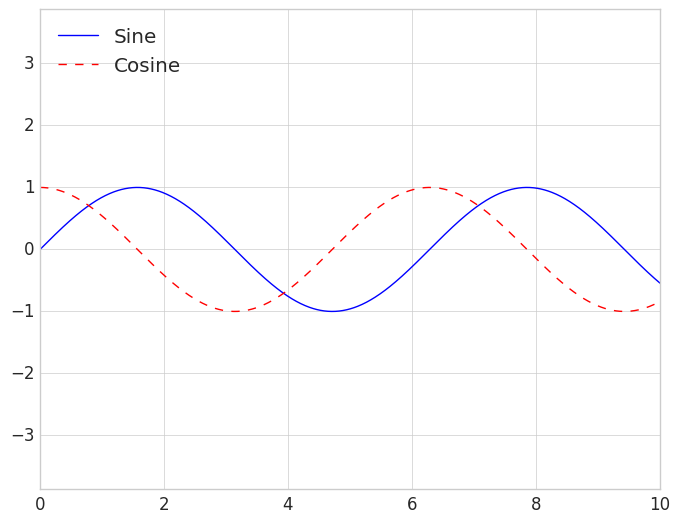

In [47]:
ax.legend(loc='upper left', frameon=False)
fig

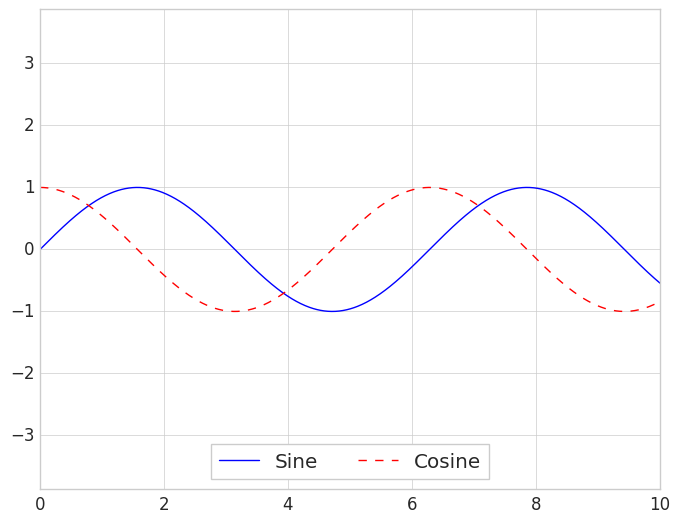

In [48]:
ax.legend(frameon=True, loc='lower center', ncol=2)
fig

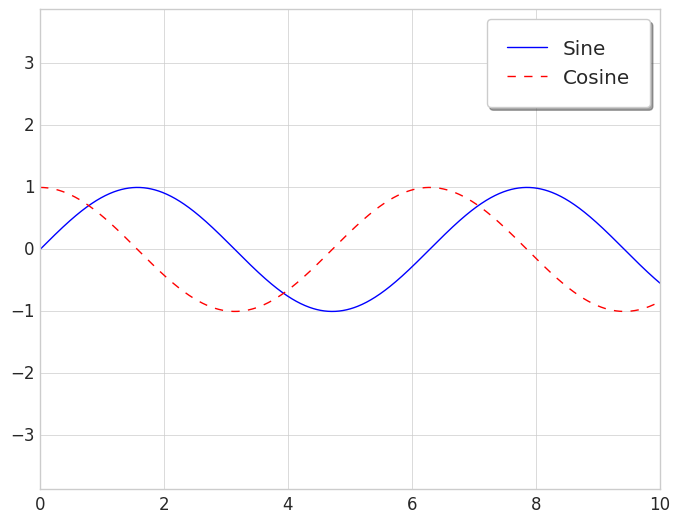

In [49]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
fig

> We can also choose what shows up in the legend all at once with the plt object. For instance this next plot has 4 lines but we only give names to 2 of them 

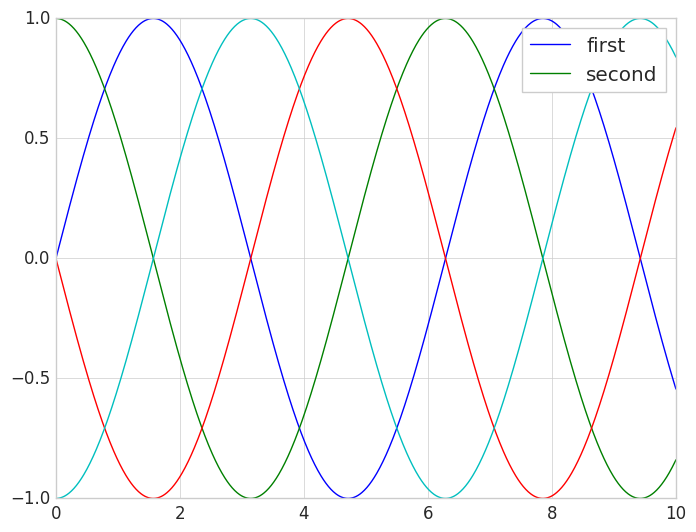

In [50]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second'], frameon=True);

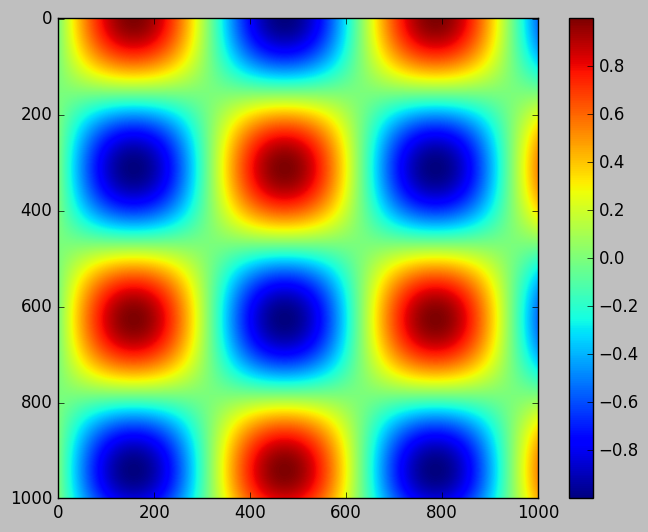

In [51]:
plt.style.use('classic')
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

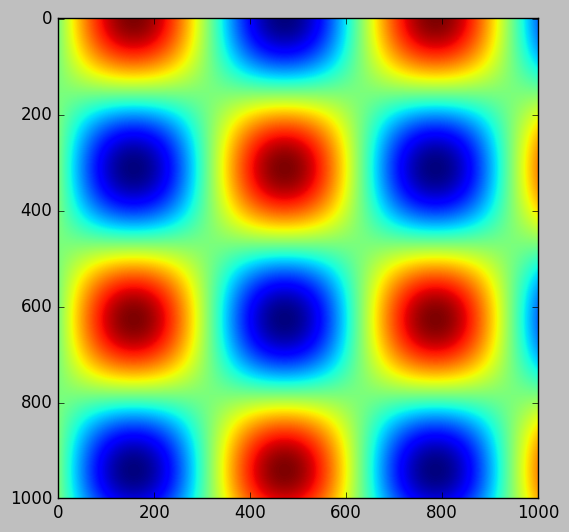

In [52]:
plt.imshow(I, cmap='jet');

In [54]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

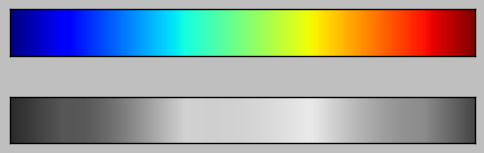

In [56]:
view_colormap('jet')

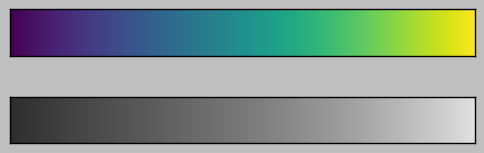

In [57]:
view_colormap('viridis')

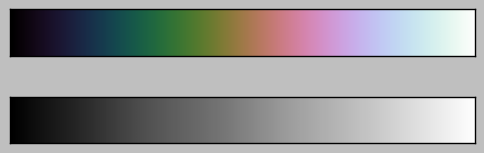

In [58]:
view_colormap('cubehelix')

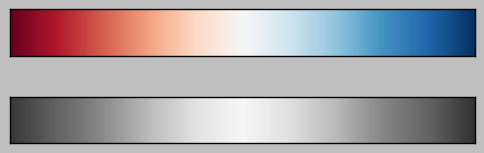

In [59]:
view_colormap('RdBu')

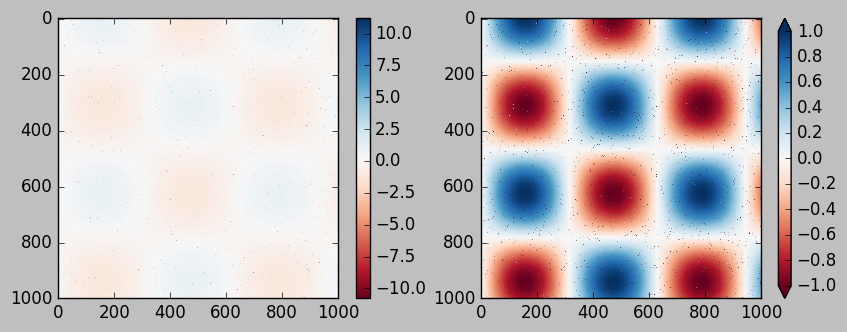

In [60]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

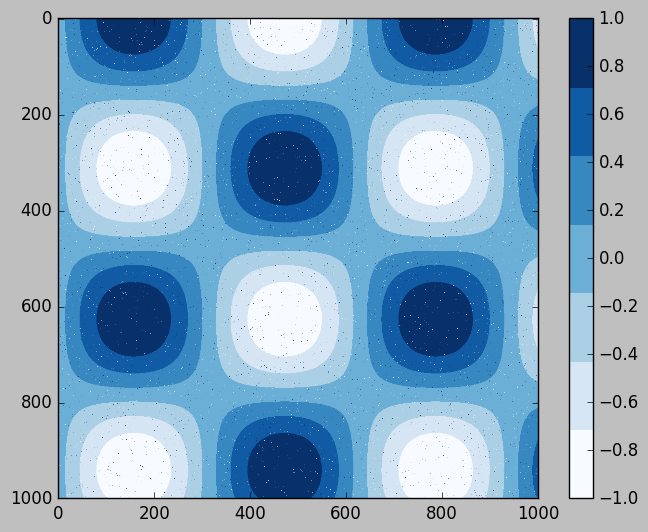

In [68]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 7))
plt.colorbar()
plt.clim(-1, 1);

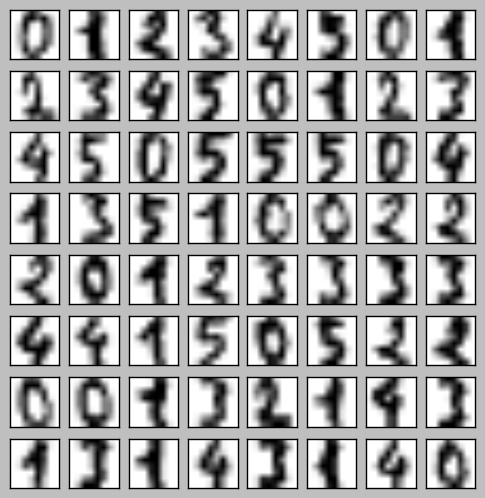

In [69]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [70]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

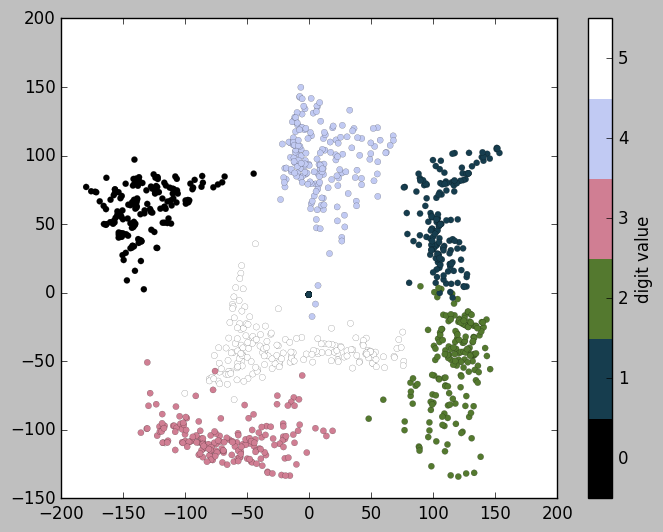

In [71]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

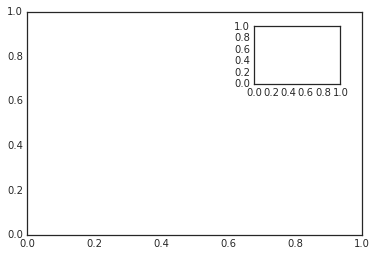

In [73]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

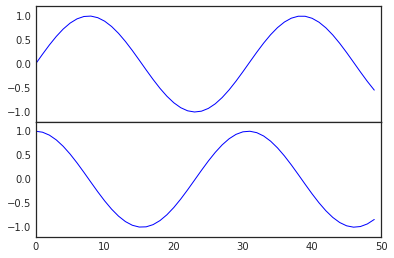

In [74]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

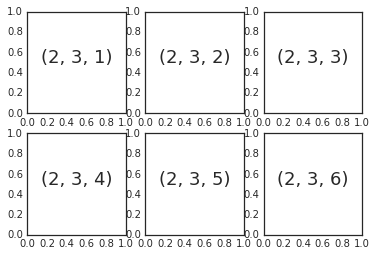

In [75]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

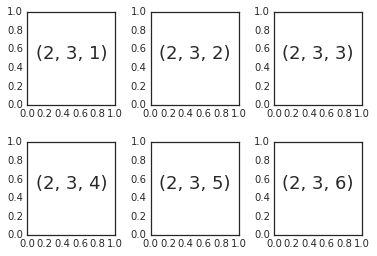

In [76]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

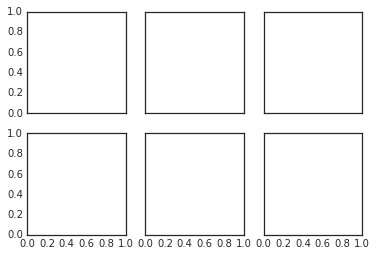

In [77]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

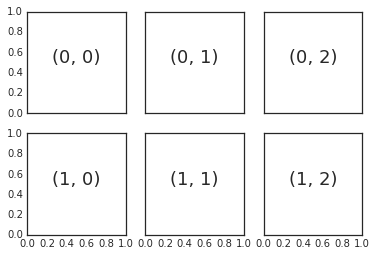

In [78]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

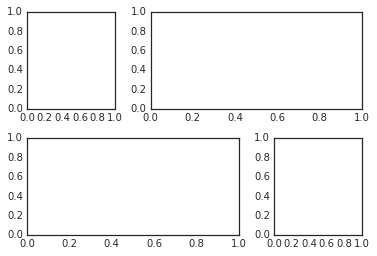

In [79]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

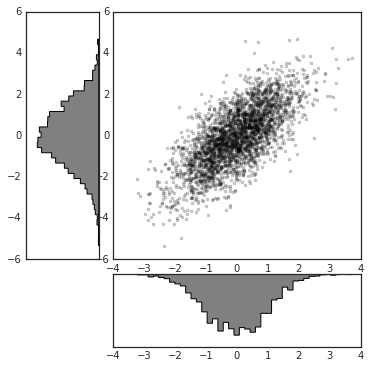

In [80]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

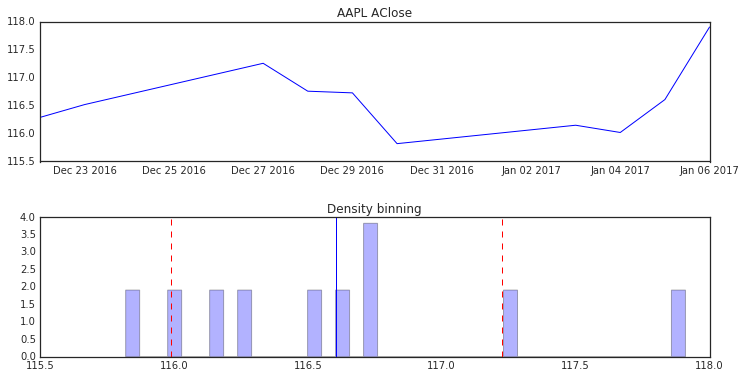

In [303]:
aapl = _stock["AAPL"].iloc[-10:,:]

fig, ax = plt.subplots(2,1,figsize=(12, 6))

ax[0].set_title("AAPL AClose")
ax[1].set_title("Density binning")

fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax[0].plot(aapl["Date"], aapl["Adj Close"], '-')

ax[1].hist(aapl["Adj Close"], histtype='stepfilled', alpha=0.3, normed=True, bins=40)
ax[1].axvline(aapl["Adj Close"].mean())
ax[1].axvline(aapl["Adj Close"].mean() + aapl["Adj Close"].std(), linestyle="--", color="r")
ax[1].axvline(aapl["Adj Close"].mean() - aapl["Adj Close"].std(), linestyle="--", color="r")

plt.show()

In [310]:
aapl.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,10.0,116.607001,0.618567,115.820000,116.185002,116.564999,116.752502,117.910004
Open,10.0,116.342999,0.577082,115.589996,115.867498,116.399997,116.617501,117.519997
High,10.0,117.102001,0.679310,116.330002,116.512501,116.985001,117.650002,118.160004
Low,10.0,115.853999,0.548395,114.760002,115.602497,115.779999,116.350001,116.489998


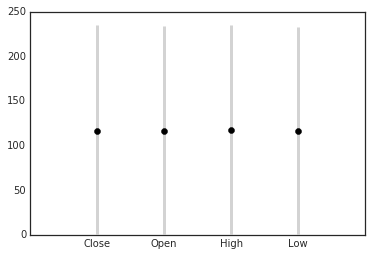

In [311]:
aapl = aapl.loc[ : , ["Close", "Open", "High", "Low"]]

x = np.arange(0, aapl.describe().T.shape[0])
y = aapl.describe().T["mean"]
dy = [aapl.describe().T["min"], aapl.describe().T["max"]]

plt.xticks(x, aapl.describe().T.index.tolist())
plt.xlim(-1, x.shape[0])
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);
plt.show()


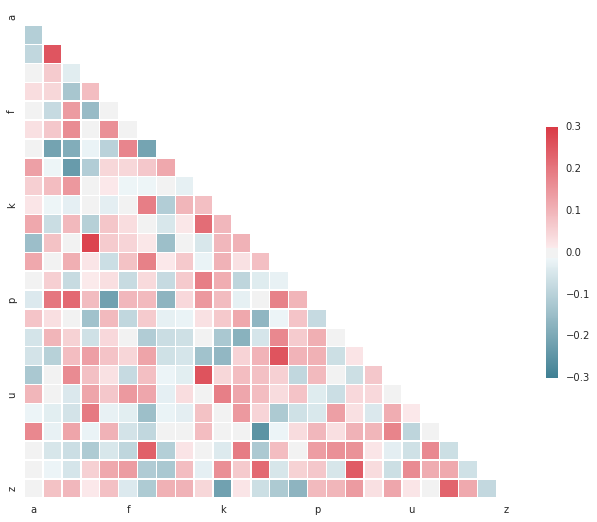

In [456]:
from string import ascii_lowercase

letters = [ascii_lowercase[_] for _ in range(26)]

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


In [457]:
corr = aapl.corr()
print(corr)

print("\n correlation: [{},{}]".format(corr.values.min(), corr.values.max()))

          Close      Open      High       Low
Close  1.000000  0.384786  0.750062  0.761037
Open   0.384786  1.000000  0.834667  0.554196
High   0.750062  0.834667  1.000000  0.767490
Low    0.761037  0.554196  0.767490  1.000000

 correlation: [0.38478625080685686,1.0]


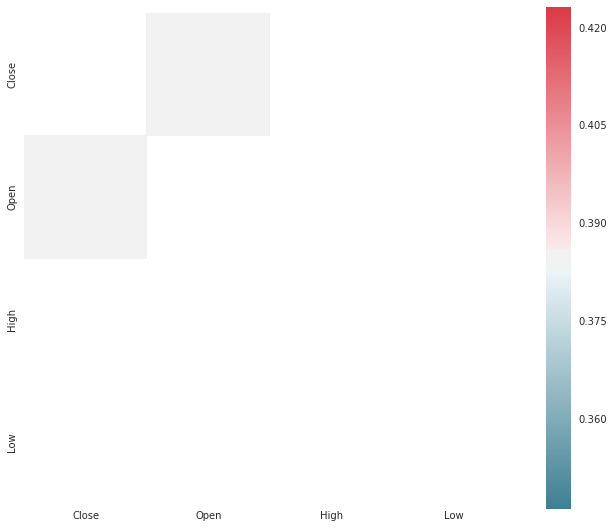

In [458]:
_r = [0, 0.4]
_c = corr[(corr <= _r[1]) & (corr >= _r[0])]

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(_c, cmap=cmap, square=True, ax=ax)


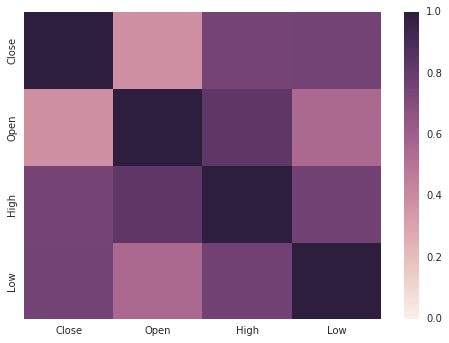

In [459]:
_r = [0, 1]
_c = corr[(corr <= _r[1]) & (corr >= _r[0])]

sns.heatmap(_c, vmin=0, vmax=1)

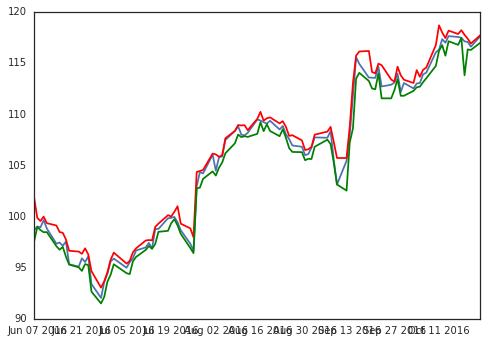

In [460]:
from_n = -150
to_n = from_n + 99

x = _stock["AAPL"].iloc[ from_n:to_n , : ]["Date"]
y = _stock["AAPL"].iloc[ from_n:to_n , : ]["Close"]
dy = np.array([_stock["AAPL"].iloc[ from_n:to_n , : ]["Low"], _stock["AAPL"].iloc[ from_n:to_n , : ]["High"]])


plt.plot(x, _stock["AAPL"].iloc[ from_n:to_n , : ]["Close"]);
plt.plot(x, _stock["AAPL"].iloc[ from_n:to_n , : ]["High"], color='red');
plt.plot(x, _stock["AAPL"].iloc[ from_n:to_n , : ]["Low"], color='green');


In [464]:
a = [1,2,3,4,5,6,7,8,9]
a

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [783]:
s = None
e = None

a[s:e]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [784]:
aapl = _stock["AAPL"][-100:]
goog = _stock["GOOG"][-100:]

KeyError: 'AAPL'

In [785]:
exc_list = ["SPY", "RWM", "TWM", "SH", "^IXIC", "^RUT", "NDX"]

initial_dataload(exc_list)

(1/7) Recv. and Stored SPY
(2/7) Recv. and Stored RWM
(3/7) Recv. and Stored TWM
(4/7) Recv. and Stored SH
(5/7) Recv. and Stored ^IXIC
(6/7) Recv. and Stored ^RUT
(7/7) Recv. and Stored NDX
Took 0:00:02.718232


{'NOK': [], 'OK': ['SPY', 'RWM', 'TWM', 'SH', '^IXIC', '^RUT', 'NDX']}

In [793]:
_exc = dict()

for tkr in exc_list:
    _exc[tkr] = pd.read_csv("{}/{}.csv".format(DATA_PATH, tkr))
    _exc[tkr]["Date"] = pd.to_datetime(_exc[tkr]["Date"], infer_datetime_format=True)

In [794]:
_exc_df = pd.DataFrame()


_exc_df["Date"] = pd.to_datetime(_exc["SPY"]["Date"], infer_datetime_format=True)
_exc_df["SPY"] = _exc["SPY"]["Close"]
_exc_df["IXIC"] = _exc["^IXIC"]["Close"]
_exc_df["RUT"] = _exc["^RUT"]["Close"]
_exc_df["NDX"] =_exc["NDX"]["Close"]
_exc_df["RWM"] =_exc["RWM"]["Close"]
_exc_df["TWM"] =_exc["TWM"]["Close"]
_exc_df["SH"] =_exc["SH"]["Close"]


_exc_df.head()

,Date,SPY,IXIC,RUT,NDX,RWM,TWM,SH
0,1993-01-29,43.9375,100.000000,168.970001,125.00,70.330002,70.540001,69.190002
1,1993-02-01,44.2500,100.839996,170.539993,123.52,70.440002,69.739998,69.739998
2,1993-02-02,44.3437,100.760002,170.429993,115.02,69.730003,68.750000,69.760002
3,1993-02-03,44.8125,100.690002,169.199997,115.25,69.010002,67.870003,69.540001
4,1993-02-04,45.0000,101.449997,168.919998,116.38,68.629997,67.699997,70.139999


In [795]:
_exc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 8 columns):
Date    6030 non-null datetime64[ns]
SPY     6030 non-null float64
IXIC    6030 non-null float64
RUT     6030 non-null float64
NDX     6030 non-null float64
RWM     2507 non-null float64
TWM     2507 non-null float64
SH      2656 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 377.0 KB


In [796]:
_exc_df = _exc_df.iloc[:, :]

In [797]:
_exc_df.corr()

,SPY,IXIC,RUT,NDX,RWM,TWM,SH
SPY,1.000000,0.780950,0.688059,0.571969,-0.756802,-0.513529,-0.833269
IXIC,0.780950,1.000000,0.830239,0.663845,0.397795,0.256194,-0.370481
RUT,0.688059,0.830239,1.000000,0.591763,-0.238537,-0.328909,-0.771407
NDX,0.571969,0.663845,0.591763,1.000000,-0.335423,-0.372505,-0.763186
RWM,-0.756802,0.397795,-0.238537,-0.335423,1.000000,0.708761,0.472754
TWM,-0.513529,0.256194,-0.328909,-0.372505,0.708761,1.000000,0.392982
SH,-0.833269,-0.370481,-0.771407,-0.763186,0.472754,0.392982,1.000000


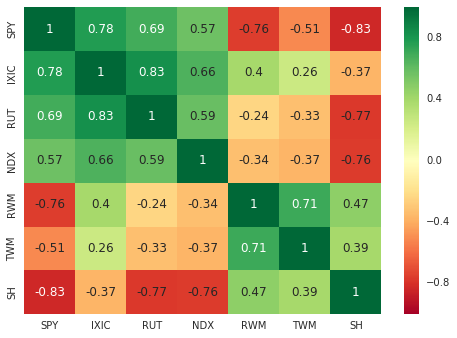

In [798]:
sns.heatmap(_exc_df.corr(), vmin=-1, vmax=1, cmap="RdYlGn", annot=True)

In [799]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score


In [800]:
X = _exc_df.loc[ : , ["IXIC", "RUT", "NDX", "RWM", "TWM", "SH"]].values
y = _exc_df["SPY"].values

X = np.nan_to_num(X)
y = np.nan_to_num(y)


In [805]:
X.shape

(6030, 6)

In [806]:

train_pred = None
test_pred = None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

print("Train Score: {}".format(train_score))
print("Test Score: {}".format(test_score))


Train Score: 0.7235602456528811
Test Score: 0.726072671733947


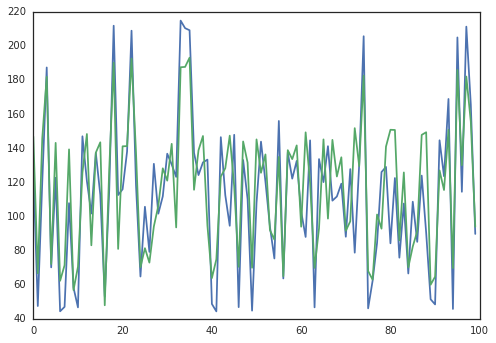

In [810]:
plt.plot(y_test[-100:])
plt.plot(test_pred[-100:])

plt.show()

In [752]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(6, input_dim=6, init="normal" , activation="relu" ))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model


estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
kfold = KFold(X.shape[0], n_folds=10)
#results = cross_val_score(estimator, X, y, cv=kfold)

print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: 387.16 (764.14) MSE


In [731]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(6, input_dim=6, init="normal" , activation="relu" ))
    model.add(Dense(6, init="normal" , activation="relu" ))
    model.add(Dense(1, init="normal" ))
    # Compile model
    model.compile(loss="mean_squared_error" , optimizer="adam" )
    return model

estimators = []
estimators.append(("standardize" , StandardScaler()))
estimators.append(("mlp" , KerasRegressor(build_fn=larger_model, nb_epoch=50, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)
kfold = KFold(X.shape[0], n_folds=10)
#results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: 1968.09 (38.36) MSE


In [732]:
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=6, init="normal" , activation="relu" ))
    model.add(Dense(1, init="normal" ))
    # Compile model
    model.compile(loss="mean_squared_error" , optimizer="adam" )
    return model

# evaluate model with standardized dataset
estimators = []
estimators.append(("standardize" , StandardScaler()))
estimators.append(("mlp" , KerasRegressor(build_fn=wider_model, nb_epoch=100, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)
kfold = KFold(X.shape[0], n_folds=10)
#results = cross_val_score(pipeline, X, y, cv=kfold)

print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: 1629.03 (126.00) MSE


In [753]:
import sympy as sy

In [754]:
x = sy.Symbol("x")
y = sy.Symbol("y")

In [759]:
3 + sy.sqrt(x) + 2**4 * -1

sqrt(x) - 13

In [761]:
f = x**2 + 3 + 0.5 * x ** 2 + 3 / 2

In [763]:
sy.simplify(f)

1.5*x**2 + 4.5

In [765]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [768]:
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [769]:
print(sy.pretty(sy.sqrt(x) + 1))

  ___    
\/ x  + 1


/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


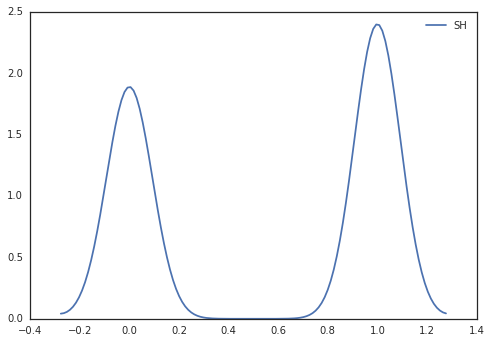

In [818]:
sns.kdeplot(_exc_df.isnull()["SH"])

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


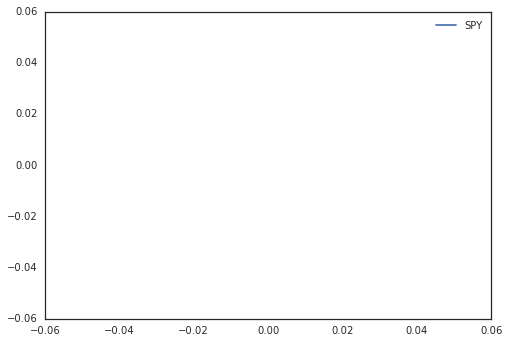

In [822]:
sns.kdeplot(_exc_df.isnull()["SPY"])

plt.show()

In [825]:
_a = ["IXIC", "RUT", "NDX", "RWM", "TWM", "SH"]

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


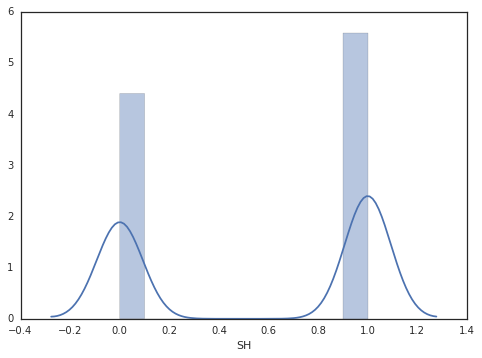

In [830]:
sns.distplot(_exc_df.isnull()["SH"])